In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

sns.set(rc = {'figure.figsize':(10,8)})

In [2]:
tweets_2 = pd.read_csv('tweets_2.csv')



print(tweets_2.shape)
tweets.head()

(100, 29)


In the following cell I will:

a) Create a subset of the data that takes only the 'text' column as we are only interested in the hashtags.

b) Use a lambda function to extract all the hashtags within the 'text' column.

c) Create a hashtags series that contains all of the extracted hashtags. I will also use th explode function to separate multiple hashtags in the same tweet to separate rows.

d) Clean the extracted hashtags regex so that we are only left with the keywords.



In [8]:
# Create subset dataframe of the text column
tweet_texts = tweets_2[['text']]

#Create a new column that captures the specific hashtags
tweet_texts["hashtags"] = tweet_texts.text.apply(lambda x: ([x for x in x.split(" ") if x.startswith("#")]))

# Seperate the hashtags in the same tweet and store it in a new df
hashtags = tweet_texts.explode('hashtags')

#Drop the text column so you have a pandas series with just the hashtags
hashtags.drop('text', axis=1, inplace=True)

# Clean the key words
hashtags['hashtags'] = hashtags['hashtags'].replace({'#':''}, regex=True)
hashtags = hashtags.dropna()
hashtags = hashtags["hashtags"]. str. lower() 


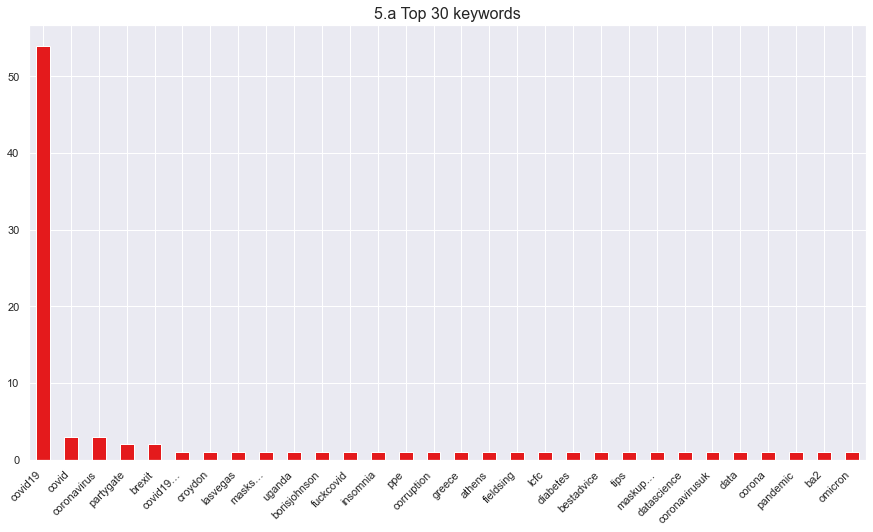

In [17]:
plt.figure(figsize=(15,8))

# Plot the top 30 hashtags
hashtags.value_counts().nlargest(30).plot(kind='bar')

plt.title('5.a Top 30 keywords', fontsize=16)
var = plt.xticks(rotation=45,ha="right")

In [10]:
# Convert the series into a df
hashtags_df = pd.DataFrame(hashtags)

# Search for vaccines in the hashtags DataFrame
hashtags_df[hashtags_df['hashtags'].apply(lambda x: 'vac' in x.lower())]

#print(hashtags_df[hashtags_df['hashtags'].apply(lambda x: 'vac' in x.lower())].count())

,hashtags
21,covidvaccination
38,vaccinations\n\ntoday


In this limited Dataframe we can observe that vaccines does not appear in the top 30 keywords. Furthmore, in the 98 keywords extrated variations of vaccine appear on only 2 occassions and only one of these appears along with covid.

Although we are not able to gain any real insight from the analysis of this particular dataset I feel that a much larger dataset consisting of trends in the specific provinces would provide a better understanding of twitter users sentiments towards the vaccine. 